#  Тетрадка для работы с длиной сцен в фильмах. 
## Вся обработка фильмов делается с помощью библиотеки scenedetect.

In [8]:
from scenedetect import VideoManager
from scenedetect import SceneManager
from scenedetect.detectors import ContentDetector

import numpy as np
import matplotlib.pyplot as plt

In [2]:
'''выдает таплы с тем, на каком кадре начинается и на каком заканчивается сцена'''
def find_scenes(video_path, threshold=35.0):
    # Create our video & scene managers, then add the detector.
    video_manager = VideoManager([video_path])
    scene_manager = SceneManager()
    scene_manager.add_detector(
        ContentDetector(threshold=threshold))

    # Improve processing speed by downscaling before processing.
    video_manager.set_downscale_factor()

    # Start the video manager and perform the scene detection.
    video_manager.start()
    scene_manager.detect_scenes(frame_source=video_manager)

    # Each returned scene is a tuple of the (start, end) timecode.
    return scene_manager.get_scene_list()

In [3]:
'''конвертирует время из часов и минут чисто в секунды'''
def time_2_num_sec(time, num_round_digits=1): 
    sec = int(time[:2]) * 3600 + int(time[3:5]) * 60 + float(time[6:])
    return round(sec, num_round_digits)

In [11]:
def film_shots_lengths_preprocessing(path):
    
    scenes = find_scenes(path) #находим сцены в фильме
    
    shot_start_times = [str(scene[0])[:-4] for scene in scenes] #вычленяем начало сцен
    full_shot_length = [str(end - start) for start, end in scenes] #вычленяем длину сцен
    
    shot_lengths = list(map(time_2_num_sec, full_shot_length)) #длину сцен конвертируем в секунды
    
    return shot_lengths, shot_start_times

In [64]:
def plot_scene_lengths(title, color, shot_lengths, shot_start_times, each_shot = 50, step=5, if_draw_line=True):

    plt.style.use('ggplot')
    plt.figure(figsize=(50,25))
    plt.bar(shot_start_times,shot_lengths, color=color)
    plt.xticks(shot_start_times[::each_shot], rotation = 45, fontsize=24)
    plt.yticks(range(0,int(max(shot_lengths) + step),step), fontsize=24)
    plt.xlabel('Shot starting', fontsize=28)
    plt.ylabel('Shot length in seconds', fontsize=28)
    plt.title(title, fontsize = 36)
    if if_draw_line:
        x = range(len(shot_start_times))
        m, b = np.polyfit(x, shot_lengths, 1)
        plt.plot(x, m*np.array(x) + b, linewidth=4)
    plt.show()

## Фильм 2012 года

In [12]:
shot_lengths_2012, shot_start_times_2012 = film_shots_lengths_preprocessing('/Users/tonleon/Desktop/Films/Anna.Karenina.2012.BDRip.AVC.RG.All.films.mkv')

100%|██████████| 186356/186356 [09:23<00:00, 330.85frames/s]


In [29]:
len(shot_lengths_2012)

1514

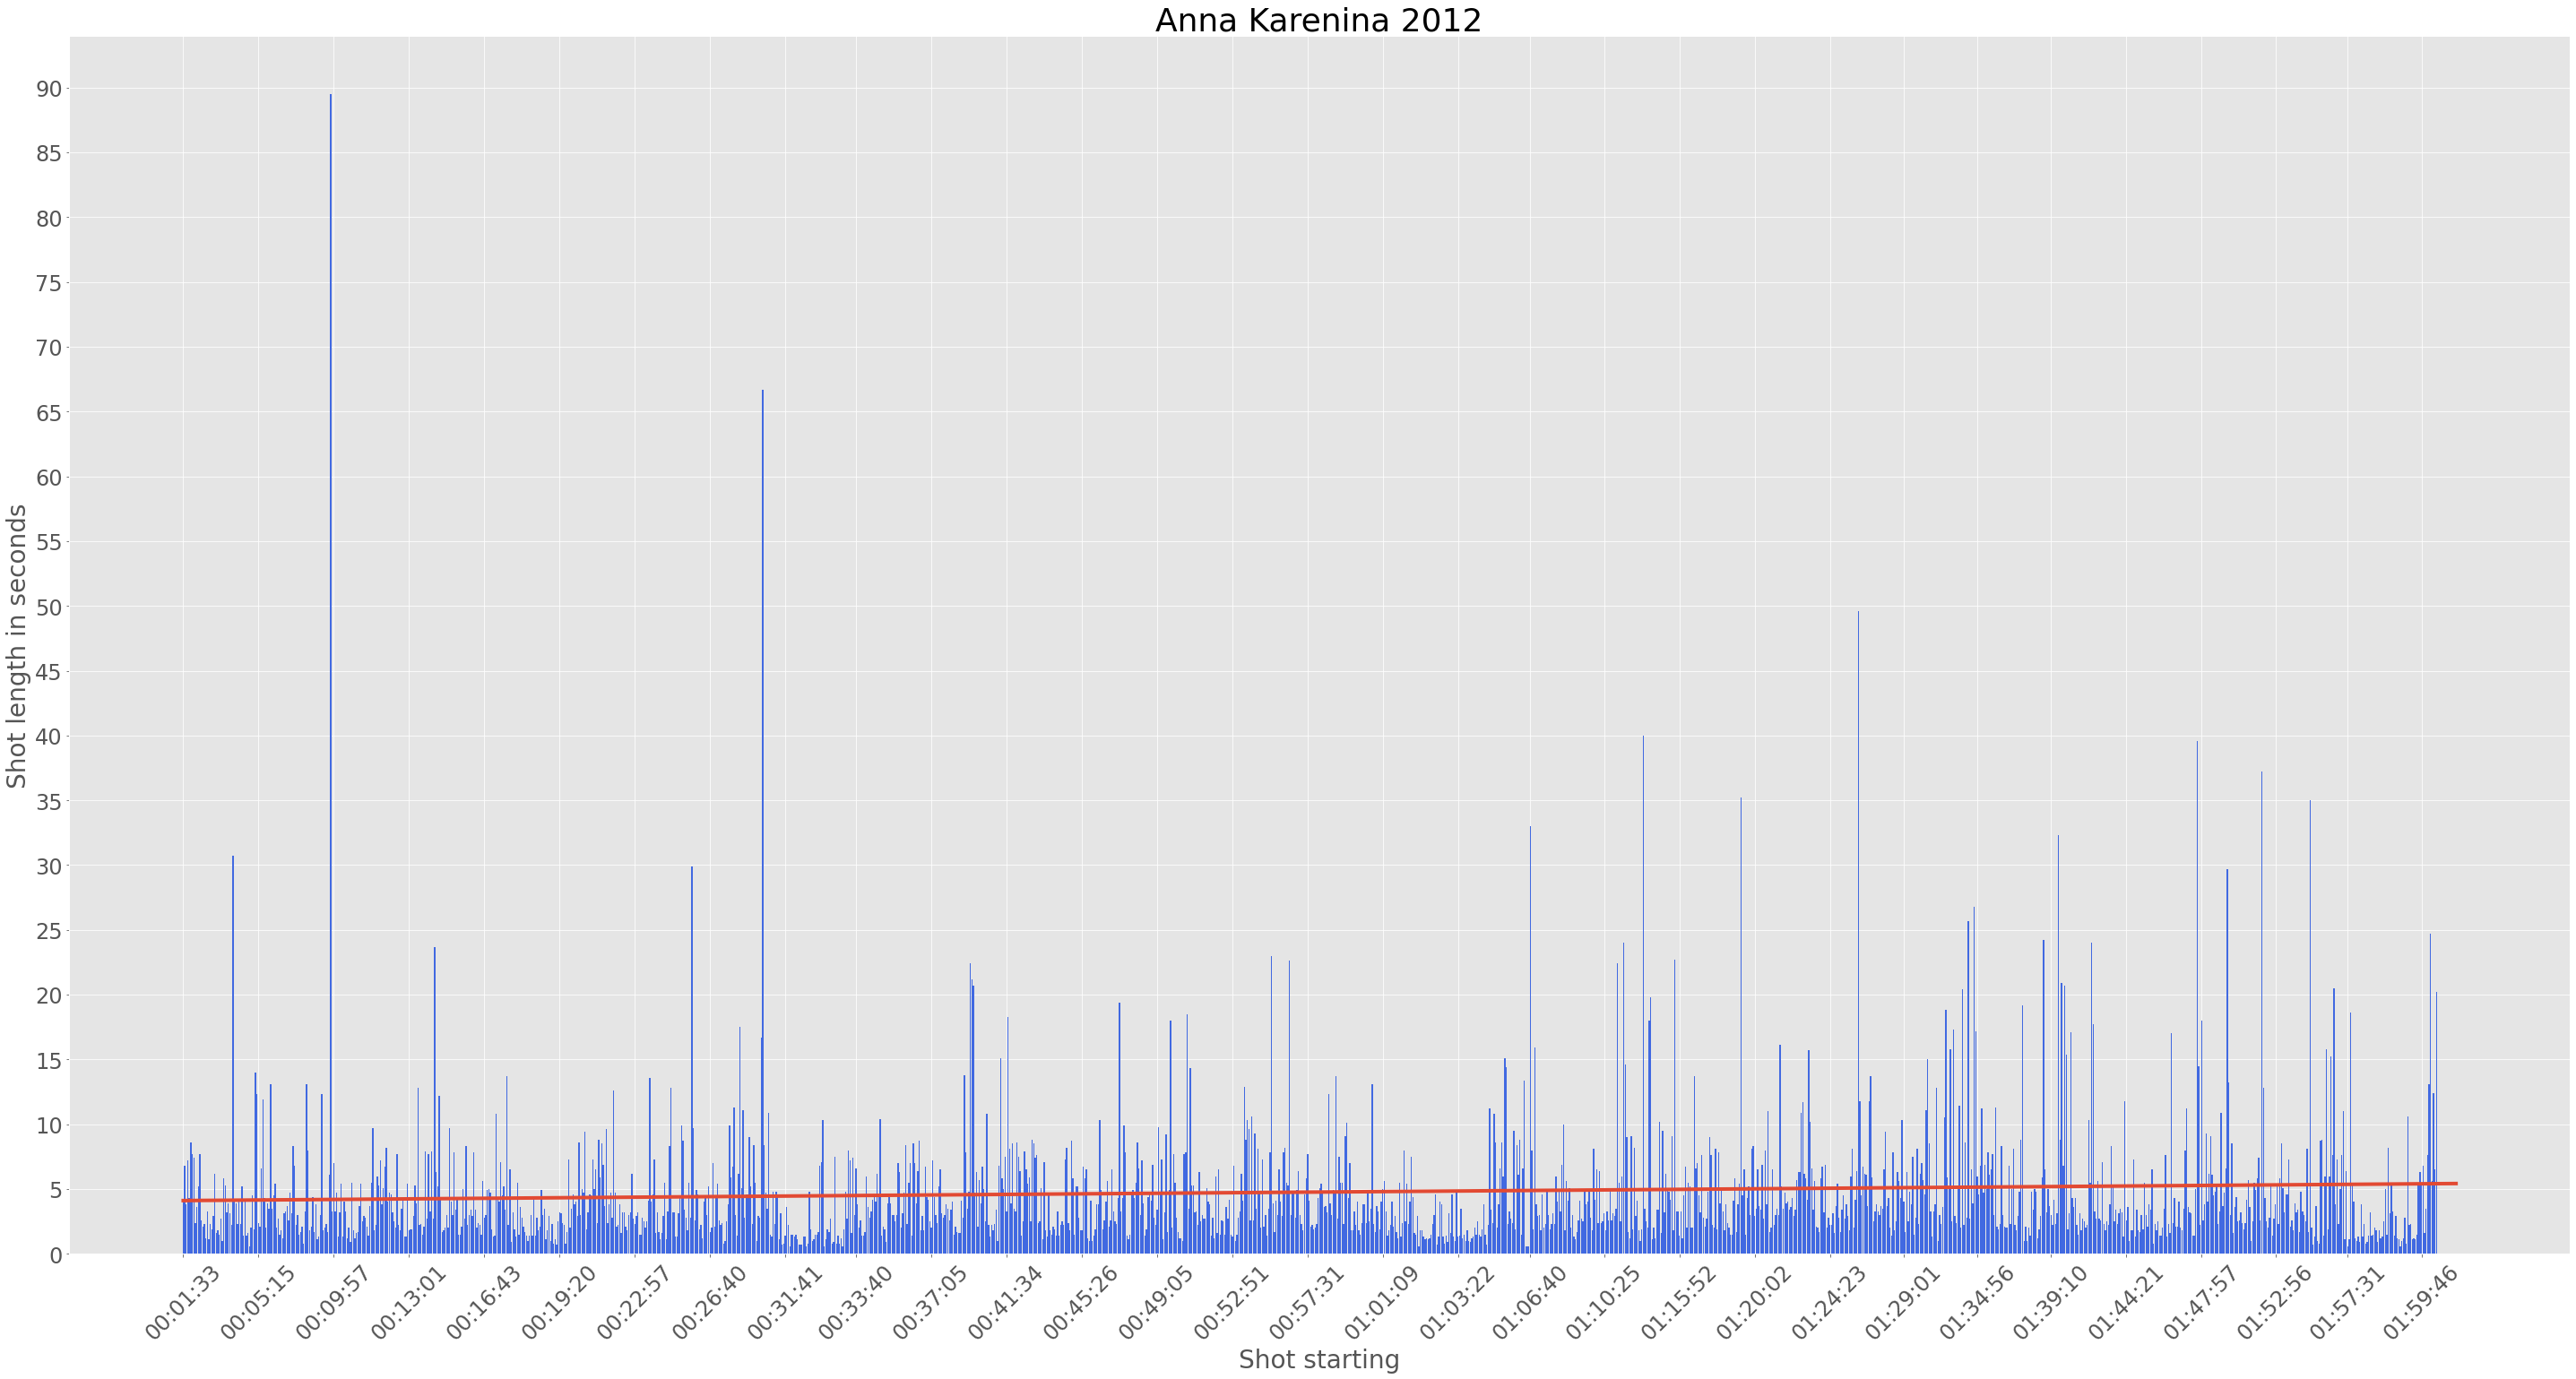

In [71]:
plot_scene_lengths('Anna Karenina 2012','royalblue', shot_lengths_2012[1:-2], shot_start_times_2012[1:-2])

## Фильм 1997 года

In [43]:
shot_lengths_1997, shot_start_times_1997 = film_shots_lengths_preprocessing('/Users/tonleon/Desktop/Films/Anna_Karenina_1997.mkv')

100%|█████████▉| 155224/155225 [12:06<00:00, 213.74frames/s]


In [46]:
len(shot_lengths_1997)

916

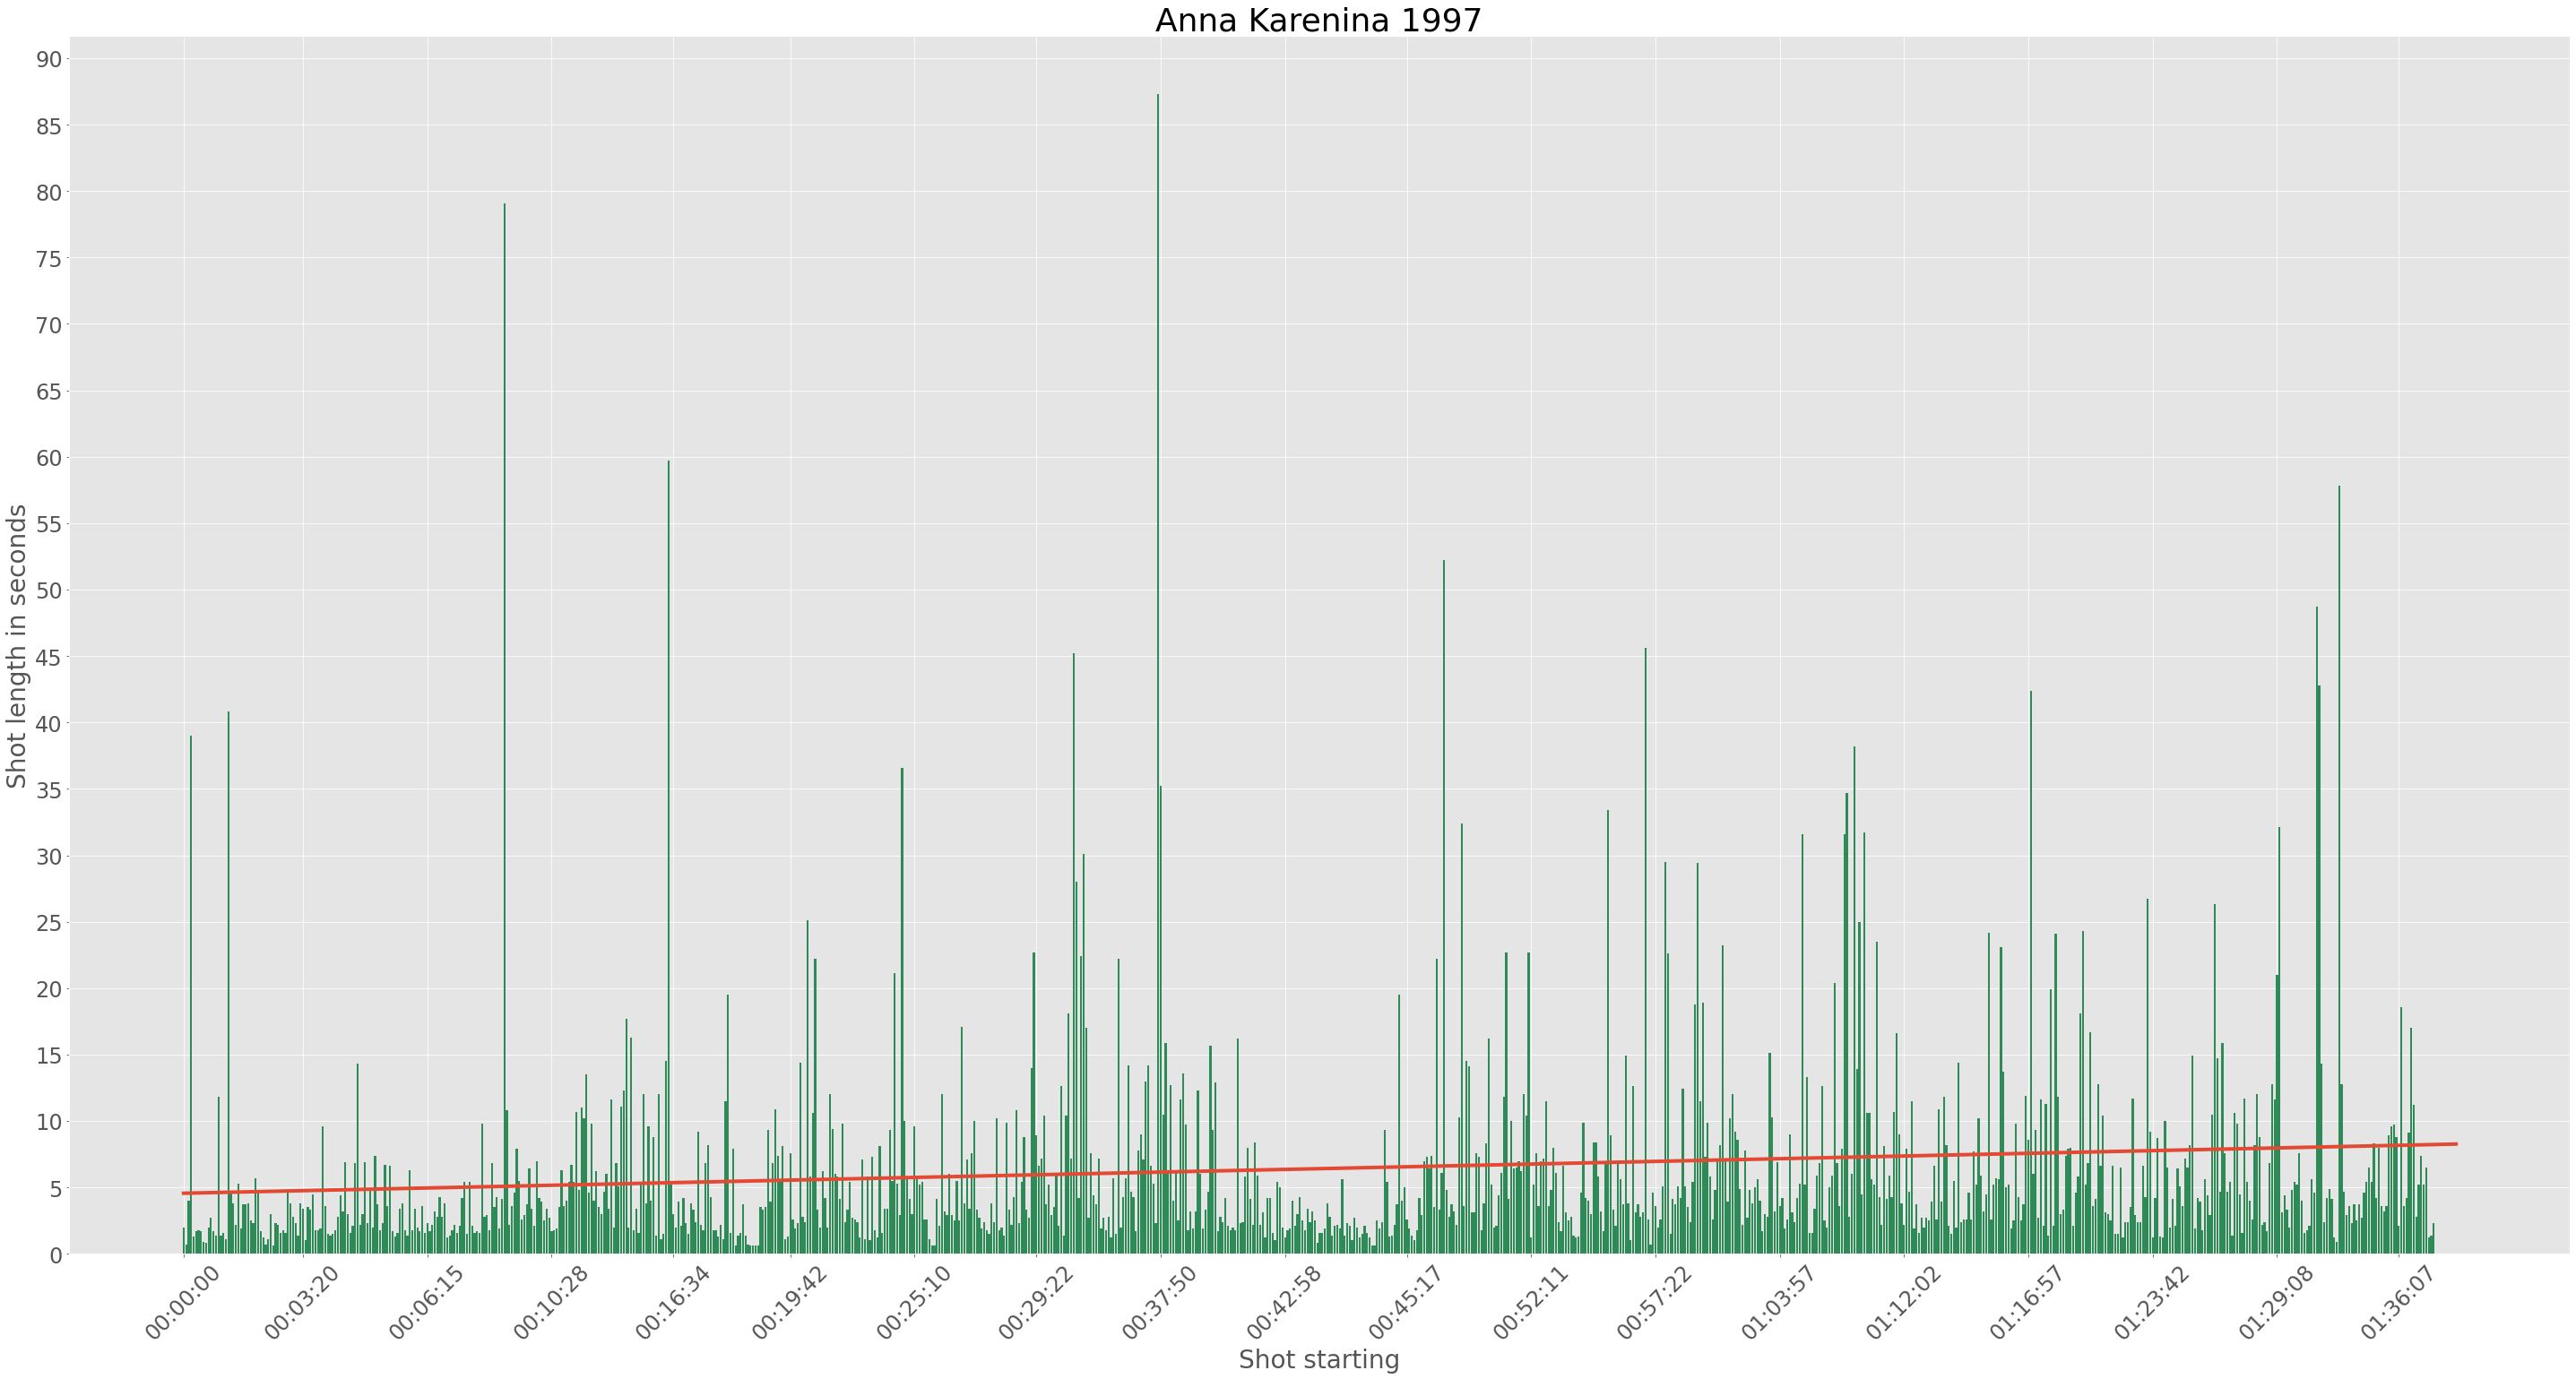

In [69]:
plot_scene_lengths('Anna Karenina 1997','seagreen', shot_lengths_1997[:-1], shot_start_times_1997[:-1])

## Фильм 1967 года

In [55]:
shot_lengths_1967_1, shot_start_times_1967_1 = film_shots_lengths_preprocessing('/Users/tonleon/Desktop/Films/Anna_Karenina_1967_1.mkv')

100%|██████████| 108689/108689 [04:45<00:00, 380.65frames/s]


In [56]:
shot_lengths_1967_2, shot_start_times_1967_2 = film_shots_lengths_preprocessing('/Users/tonleon/Desktop/Films/Anna_Karenina_1967_2.mkv')

100%|██████████| 96539/96539 [04:16<00:00, 375.99frames/s]


In [58]:
print(len(shot_lengths_1967_1))
print(len(shot_lengths_1967_2))

462
208


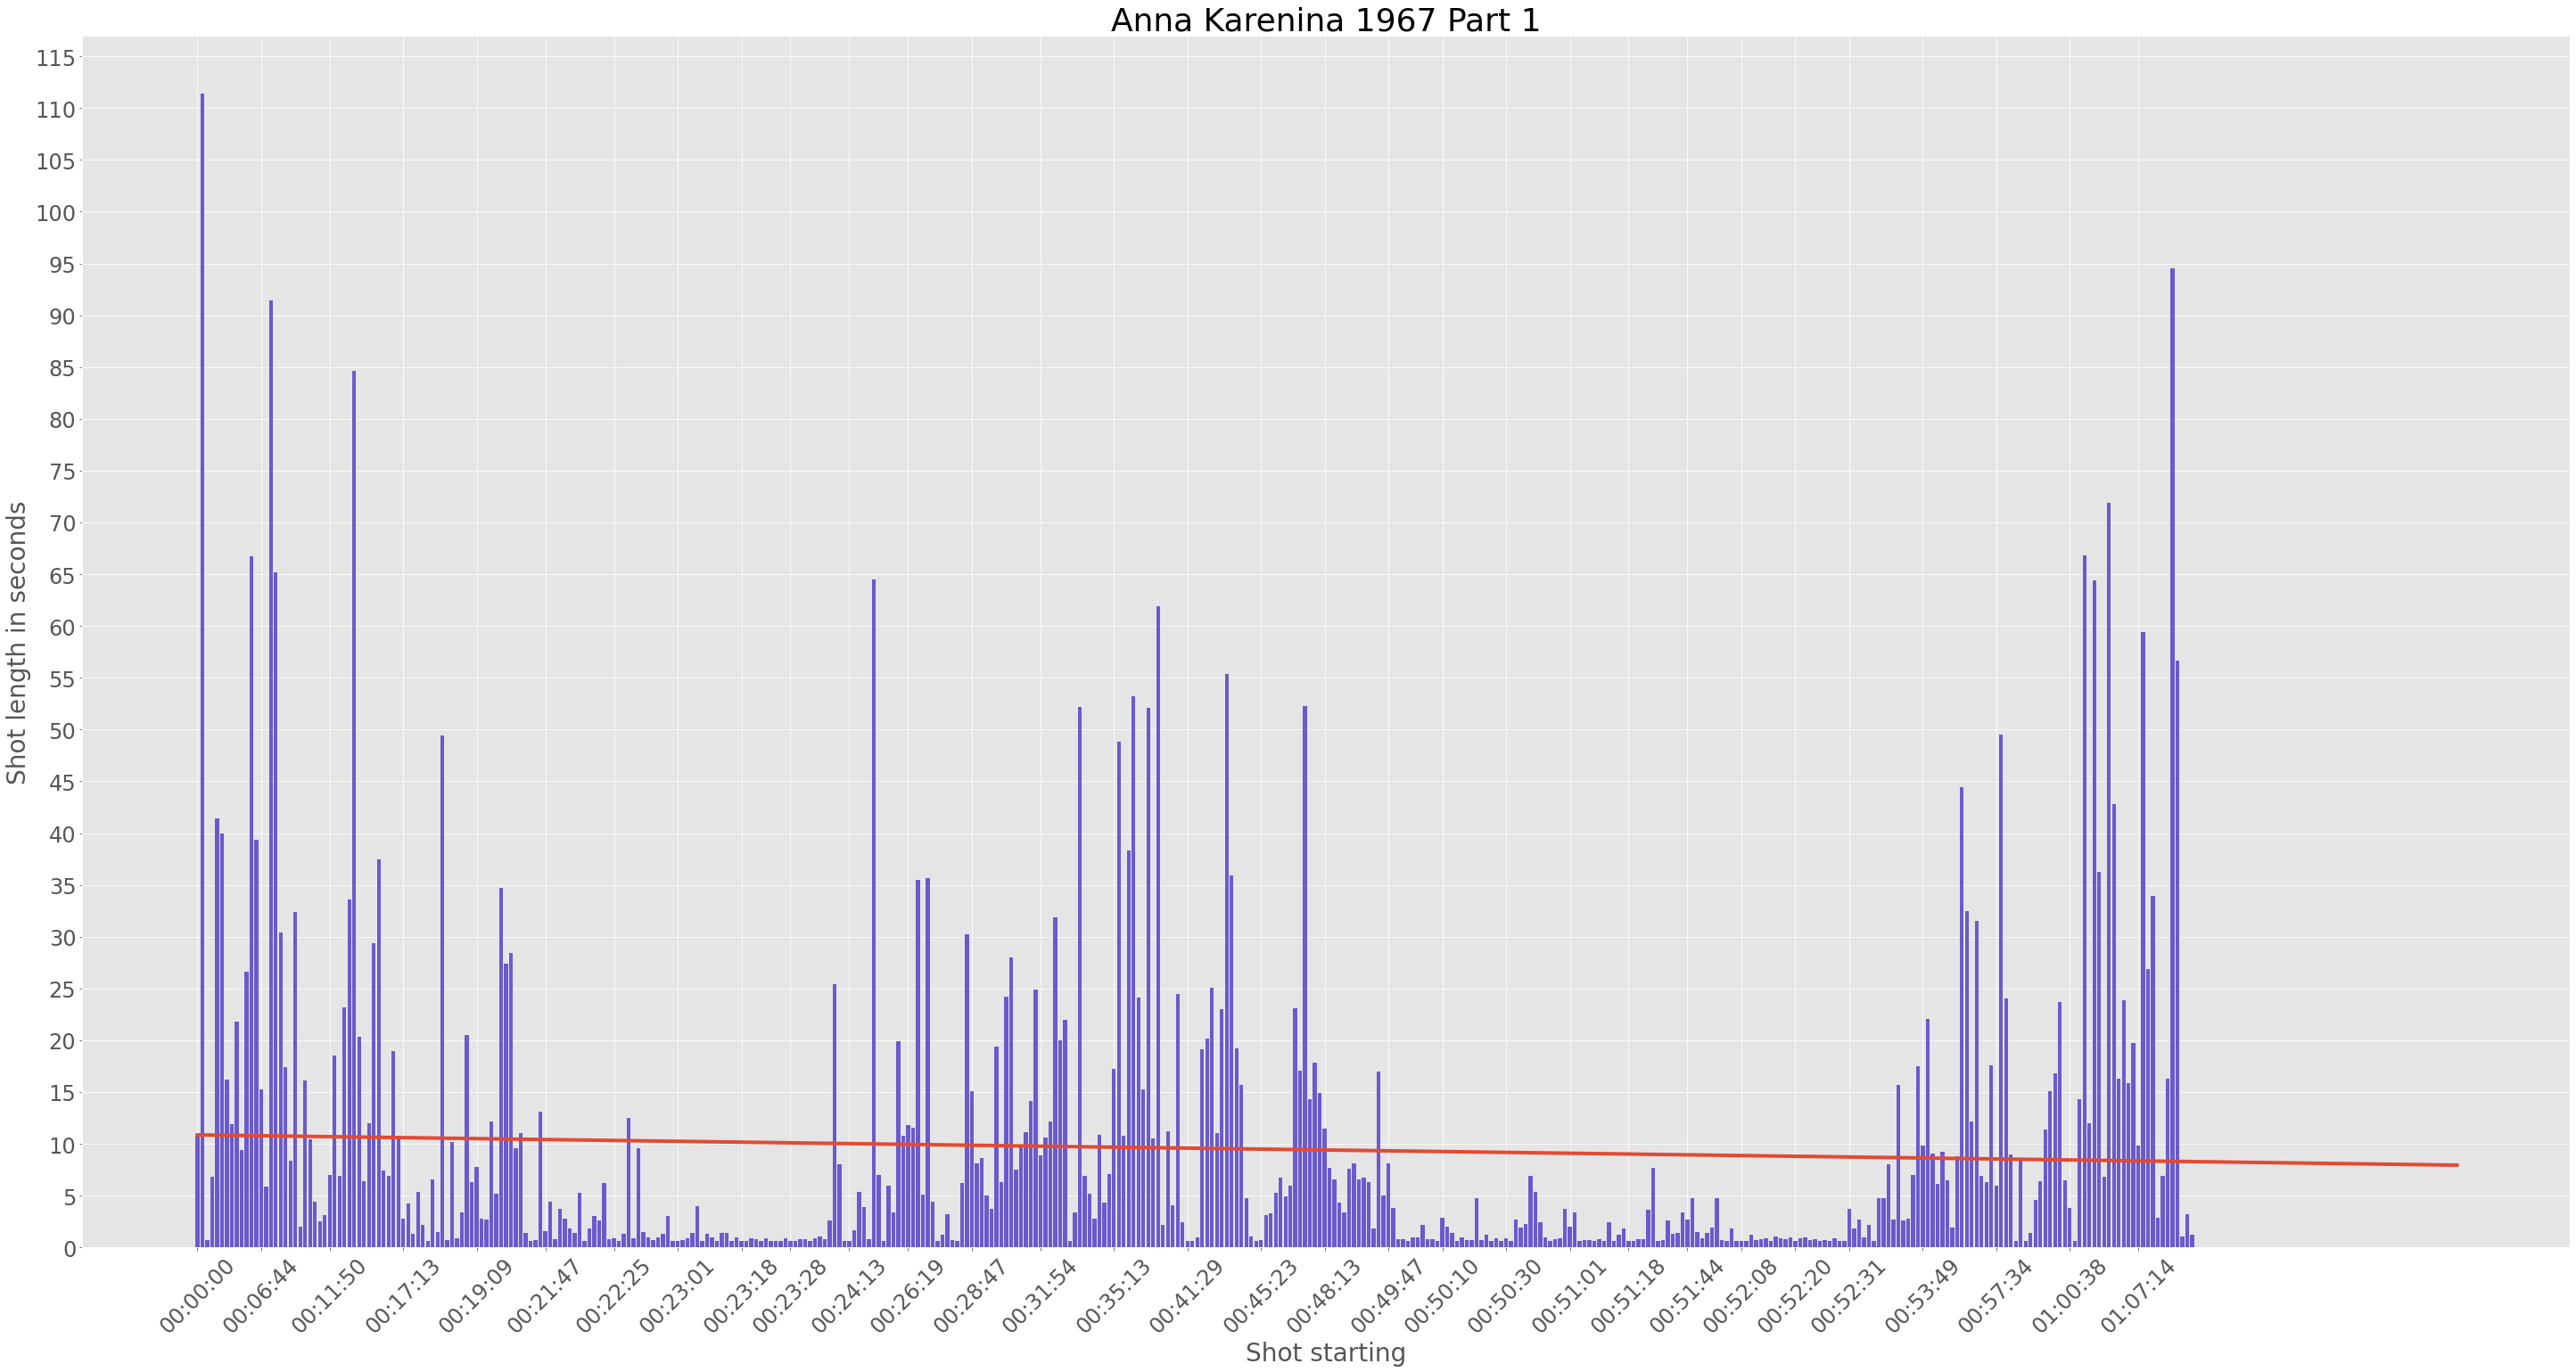

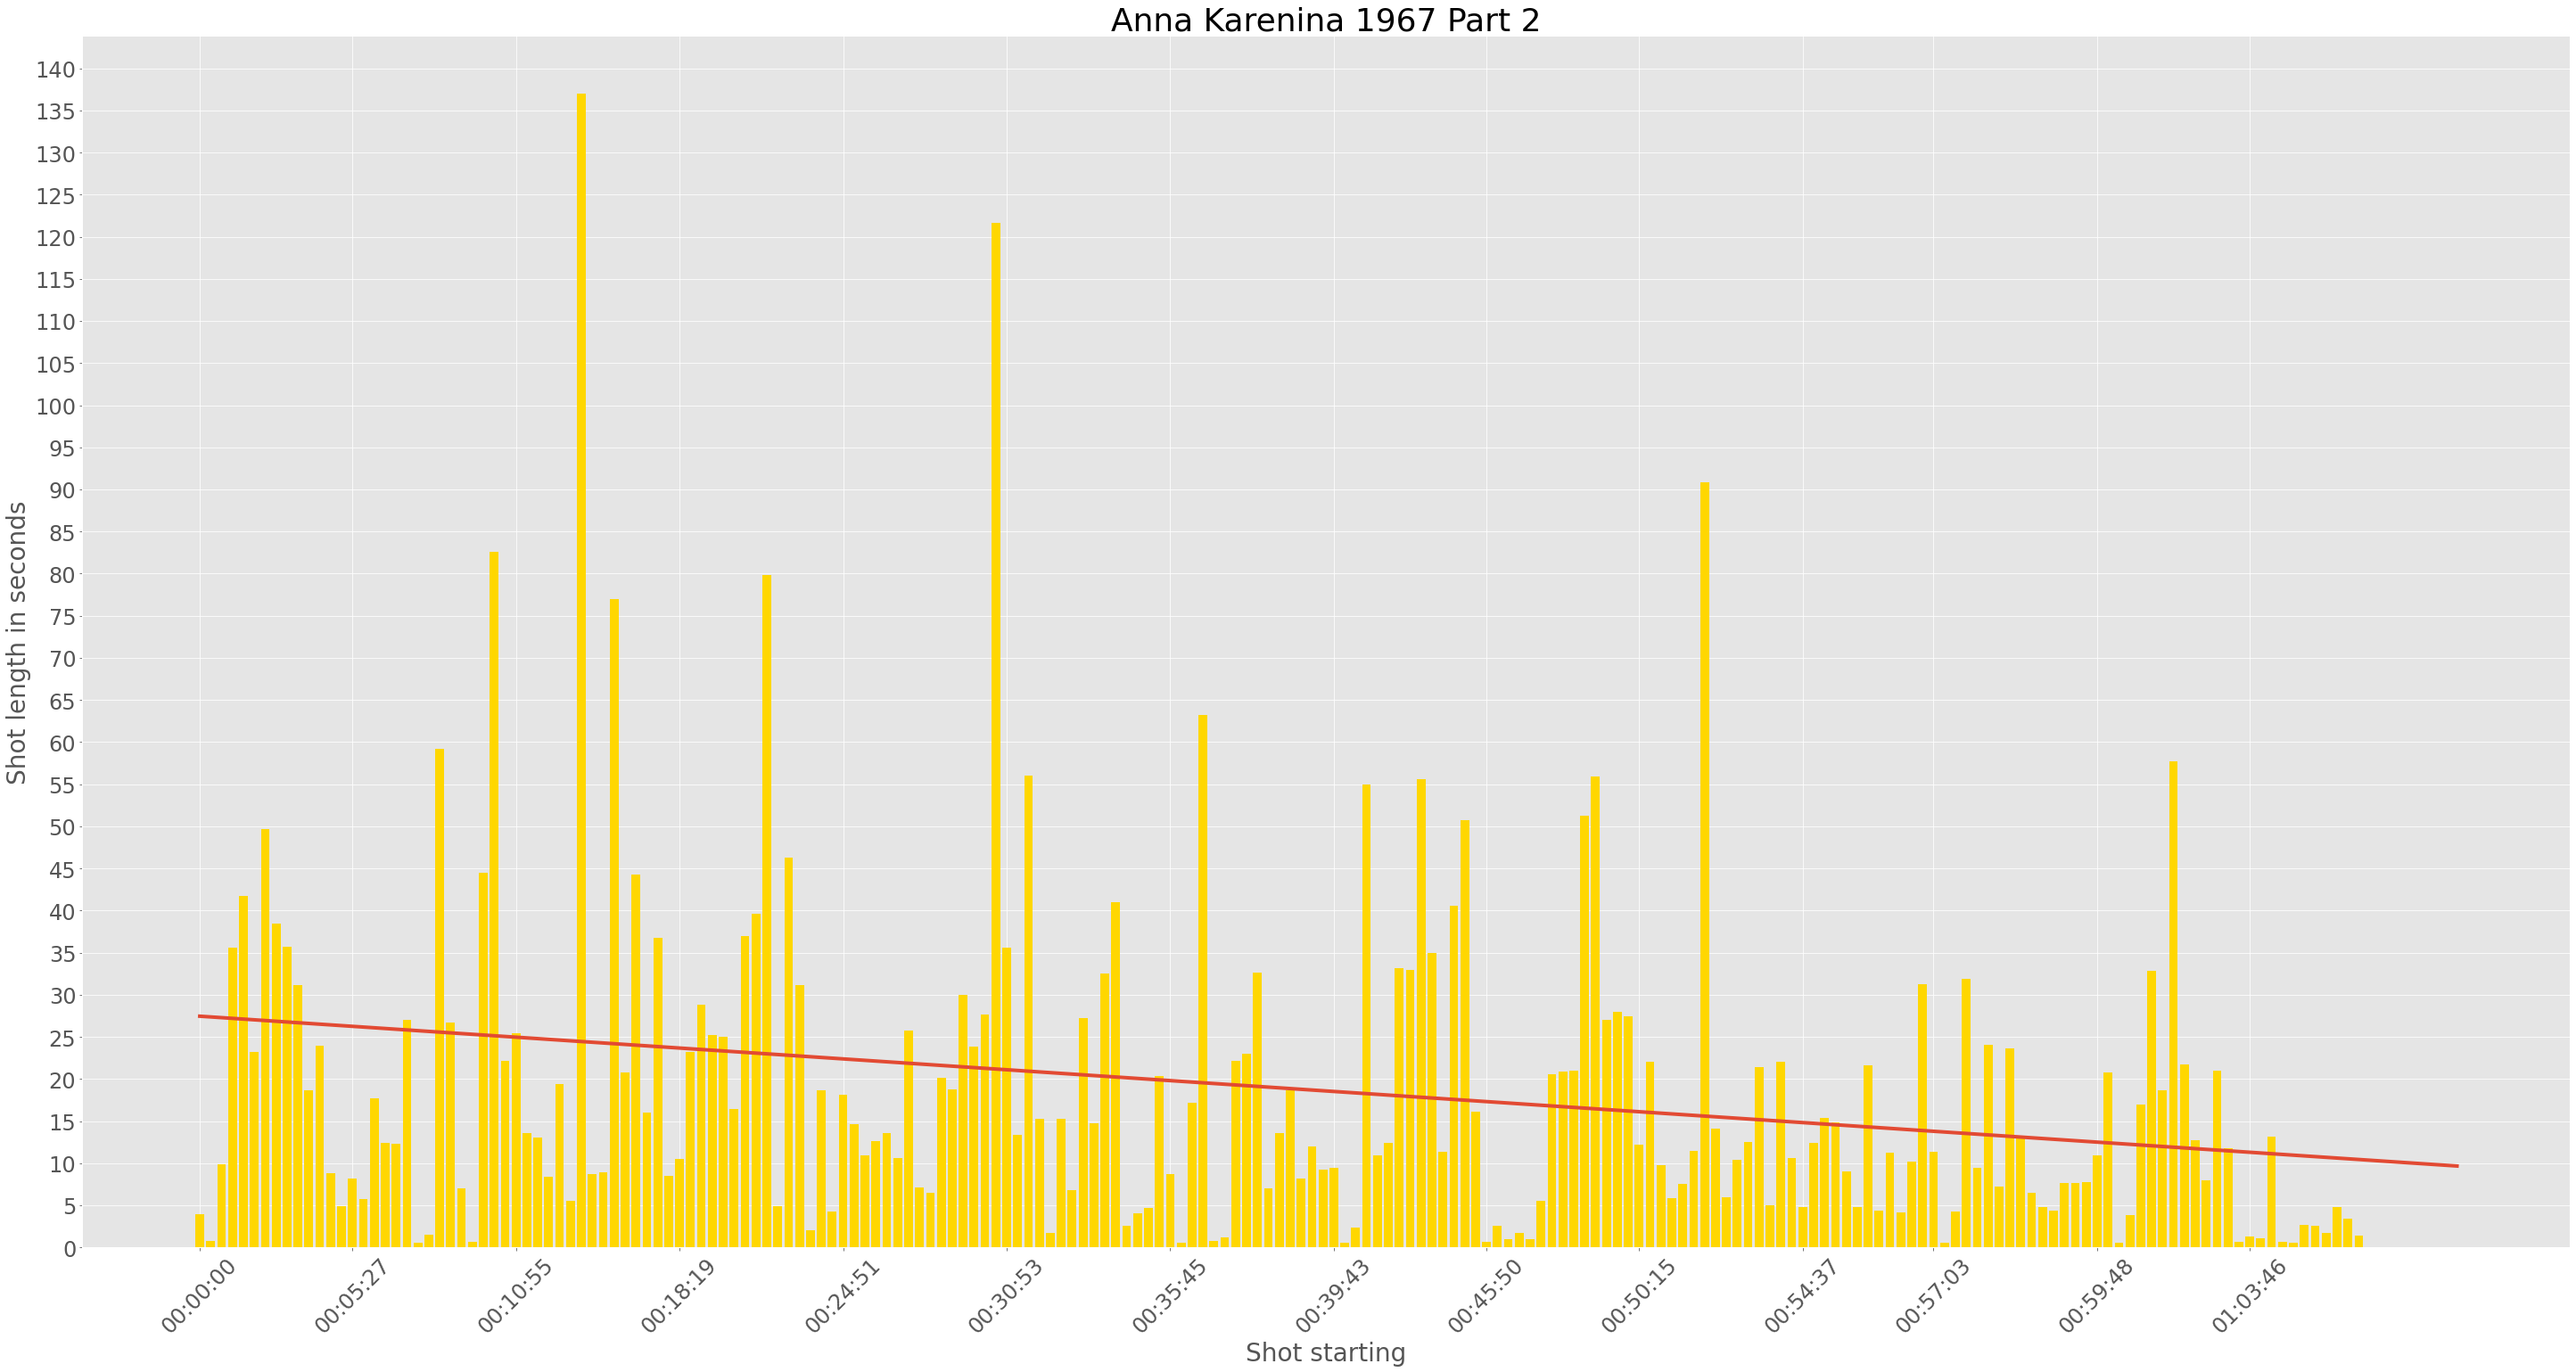

In [70]:
plot_scene_lengths('Anna Karenina 1967 Part 1','slateblue', shot_lengths_1967_1, shot_start_times_1967_1, 15)
plot_scene_lengths('Anna Karenina 1967 Part 2','gold', shot_lengths_1967_2, shot_start_times_1967_2, 15)